In [1]:
import control as ct
import numpy as np
import display_utils as dp
import matplotlib.pyplot as plt

### Open-Loop Disturbance to Output Speed Transfer Function

<IPython.core.display.Math object>

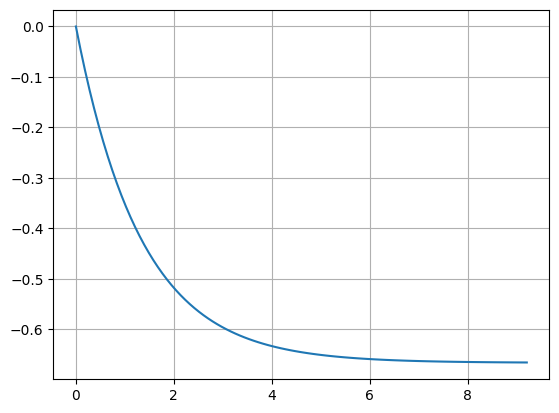

Final value of output speed stead state error: -0.6660 rad/s


In [2]:
Ra = 1; Km = 10; J = 2; b = 0.5; Kb = 0.1; Ka = 54; Kt = 1
sys_o1 = ct.tf([1], [J, b])
sys_o2 = ct.tf([Km*Kb/Ra], [1])
sys_o = ct.feedback(sys_o1, sys_o2) 
sys_o *= -1 # since disturbance has negative sign
dp.tf(sys_o, "Open-Loop Disturbance to Output Speed Transfer Function")
print()
T, y_o_out = ct.step_response(sys_o)
plt.figure()
plt.grid()
plt.plot(T, y_o_out)
plt.show()
last_value = y_o_out[-1]
print(f"Final value of output speed stead state error: {last_value:.4f} rad/s")

### Closed-Loop Disturbance to Output Speed Transfer Function

<IPython.core.display.Math object>

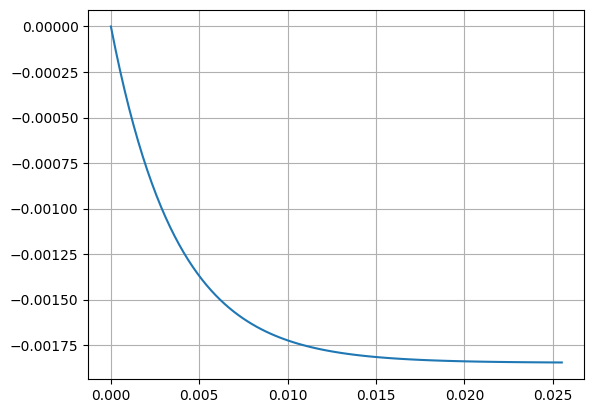

Final value of output speed stead state error: -0.0018 rad/s


In [3]:
sys_c1 = ct.tf([1], [J, b])
sys_c2 = ct.tf([Ka*Kt], [1])
sys_c3 = ct.tf([Kb], [1])
sys_c4 = ct.tf([Km/Ra], [1])

sys_ca = ct.parallel(sys_c2, sys_c3)
sys_cb = ct.series(sys_ca, sys_c4)
sys_c = ct.feedback(sys_c1, sys_cb)
sys_c *= -1 # since disturbance has negative sign

dp.tf(sys_c, "Closed-Loop Disturbance to Output Speed Transfer Function")
print()
T, y_c_out = ct.step_response(sys_c)
plt.figure()
plt.grid()
plt.plot(T, y_c_out)
plt.show()
last_value = y_c_out[-1]
print(f"Final value of output speed stead state error: {last_value:.4f} rad/s")
